# DATA LOADING + PREPROCESSING + EDA

Saving Dataset of Diabetes.csv to Dataset of Diabetes.csv
Loaded: Dataset of Diabetes.csv
Shape: (1000, 14)


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N



=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   string 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   string 
dtypes: float64(8), int64(4), string(2)
memory usage: 109.5 KB

=== Describe (numeric) ===


,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000



=== CLASS counts (raw) ===
CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: Int64

=== CLASS counts (cleaned) ===
CLASS
Y    844
N    103
P     53
Name: count, dtype: Int64

Columns: ['ID', 'No_Pation', 'Gender', 'Age', 'Urea', 'Creatinine', 'HbA1c', 'Cholesterol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']

Class mapping (encoded -> original):
0 -> N
1 -> P
2 -> Y


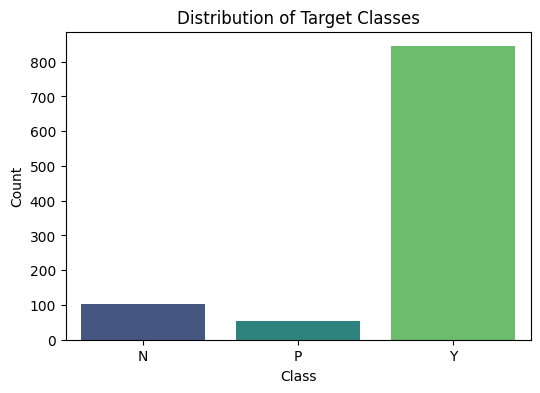

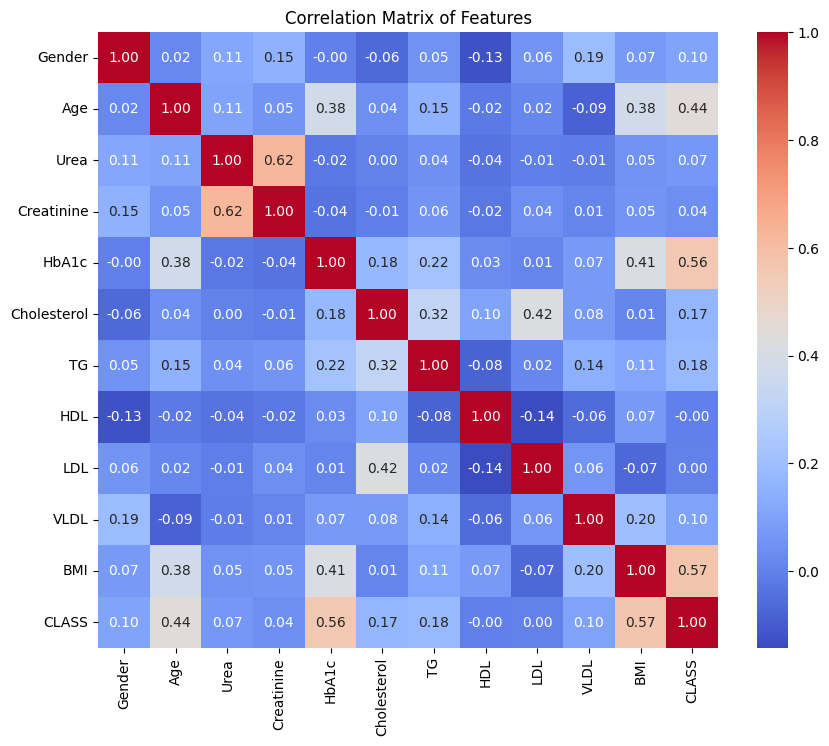


Shapes:
X_train: (640, 11)
X_val:   (160, 11)
X_test:  (200, 11)


In [ ]:
# ==========================================
# 1) DATA LOADING + PREPROCESSING + EDA
# ==========================================

import warnings
warnings.filterwarnings("ignore")

import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

# ------------------------------------------
# A) Load dataset + quick sanity checks
# ------------------------------------------

# Upload CSV from local machine
uploaded = files.upload()
fname = next(iter(uploaded))
print("Loaded:", fname)

# Read CSV (robust to encoding issues)
try:
    diabetes = pd.read_csv(
        io.BytesIO(uploaded[fname]),
        dtype={"CLASS": "string", "Gender": "string"},
        encoding="utf-8"
    )
except UnicodeDecodeError:
    diabetes = pd.read_csv(
        io.BytesIO(uploaded[fname]),
        dtype={"CLASS": "string", "Gender": "string"},
        encoding="latin-1"
    )

print("Shape:", diabetes.shape)
display(diabetes.head())

print("\n=== Data Info ===")
diabetes.info()

print("\n=== Describe (numeric) ===")
display(diabetes.describe())

# Raw class distribution (before cleaning)
print("\n=== CLASS counts (raw) ===")
print(diabetes["CLASS"].value_counts(dropna=False))

# Normalize CLASS strings: strip spaces and uppercase
diabetes["CLASS"] = diabetes["CLASS"].str.strip().str.upper()

# Map common textual variants to Y / N / P (if they appear)
map_variants = {
    "YES": "Y",
    "NO": "N",
    "PREDICTED": "P",
    "PREDICTED-DIABETIC": "P",
    "PREDICTED_DIABETIC": "P"
}
diabetes["CLASS"] = diabetes["CLASS"].replace(map_variants)

# Class distribution after cleaning
print("\n=== CLASS counts (cleaned) ===")
print(diabetes["CLASS"].value_counts(dropna=False))

# Optional: standardize a few column names for consistency
diabetes = diabetes.rename(columns={
    "AGE": "Age",
    "Cr": "Creatinine",
    "Chol": "Cholesterol"
})

# Working copy
df = diabetes.copy()

print("\nColumns:", df.columns.tolist())

# ------------------------------------------
# B) Basic preprocessing (drop IDs, encode)
# ------------------------------------------

# Drop ID-like columns if they exist
for col in ["No. of Patient", "No_Pation", "ID"]:
    if col in df.columns:
        df = df.drop(columns=[col])

# Encode Gender if present
if "Gender" in df.columns:
    le_gender = LabelEncoder()
    df["Gender"] = le_gender.fit_transform(df["Gender"].astype(str))

# Encode CLASS (target)
le_class = LabelEncoder()
df["CLASS"] = le_class.fit_transform(df["CLASS"].astype(str))
target_names = list(le_class.classes_)

print("\nClass mapping (encoded -> original):")
for i, name in enumerate(target_names):
    print(f"{i} -> {name}")

# ------------------------------------------
# C) EDA: class distribution & correlation
# ------------------------------------------

plt.figure(figsize=(6, 4))
sns.countplot(x="CLASS", data=df, palette="viridis")
plt.title("Distribution of Target Classes")
plt.xticks(ticks=[0, 1, 2], labels=target_names)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# ------------------------------------------
# D) Train / Validation / Test split
# ------------------------------------------

X = df.drop("CLASS", axis=1)
y = df["CLASS"]

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.2, random_state=RANDOM_STATE, stratify=y_trainval
)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_val:  ", X_val.shape)
print("X_test: ", X_test.shape)

# ------------------------------------------
# E) Scaling for SVM and KNN
# ------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
print(df.isna().sum())
print("Total missing:", df.isna().sum().sum())


Gender         0
Age            0
Urea           0
Creatinine     0
HbA1c          0
Cholesterol    0
TG             0
HDL            0
LDL            0
VLDL           0
BMI            0
CLASS          0
dtype: int64
Total missing: 0


# SVM Model


            SVM CLASSIFIER

[Baseline SVM] Validation Accuracy: 0.8875
[Baseline SVM] Validation F1 (weighted): 0.9000
[Baseline SVM] Validation F1 (macro): 0.7580

[SVM GridSearch] Starting hyperparameter search...

[SVM GridSearch] Best Parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
[SVM GridSearch] Best CV F1 (weighted): 0.9360

[Tuned SVM] Validation Accuracy: 0.9375
[Tuned SVM] Validation F1 (weighted): 0.9388
[Tuned SVM] Validation F1 (macro): 0.8351

[Tuned SVM] Classification Report (Validation):
              precision    recall  f1-score   support

           N       0.87      0.81      0.84        16
           P       0.64      0.78      0.70         9
           Y       0.97      0.96      0.97       135

    accuracy                           0.94       160
   macro avg       0.82      0.85      0.84       160
weighted avg       0.94      0.94      0.94       160


=== SVM Test Results ===
Accuracy: 0.9600
F1 (weighted): 0.9604
F1 (macro): 0.8637

Classificat

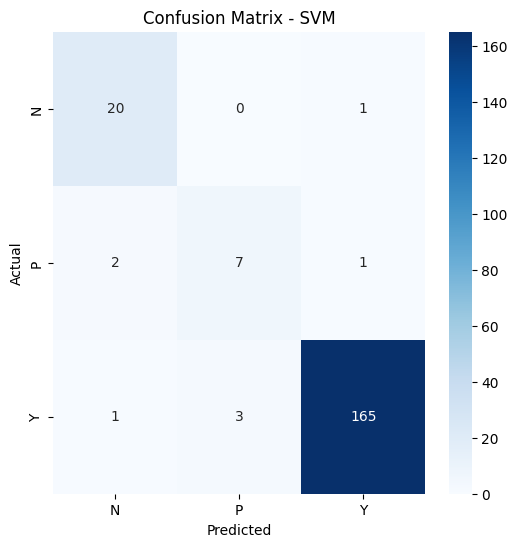

In [ ]:
# ==========================================
# 2) SVM CLASSIFIER
# ==========================================

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

print("\n==========================================")
print("            SVM CLASSIFIER")
print("==========================================")

# ---------------------------
# 1) Baseline SVM
# ---------------------------

svm_baseline = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=RANDOM_STATE
)

# Train baseline SVM on scaled training data
svm_baseline.fit(X_train_scaled, y_train)

# Validation performance for baseline
y_val_pred_svm_base = svm_baseline.predict(X_val_scaled)

val_acc_svm_base = accuracy_score(y_val, y_val_pred_svm_base)
val_f1_weighted_svm_base = f1_score(y_val, y_val_pred_svm_base, average="weighted")
val_f1_macro_svm_base = f1_score(y_val, y_val_pred_svm_base, average="macro")

print("\n[Baseline SVM] Validation Accuracy: {:.4f}".format(val_acc_svm_base))
print("[Baseline SVM] Validation F1 (weighted): {:.4f}".format(val_f1_weighted_svm_base))
print("[Baseline SVM] Validation F1 (macro): {:.4f}".format(val_f1_macro_svm_base))

# ---------------------------
# 2) GridSearchCV Tuning
# ---------------------------

# Safe number of CV splits based on smallest class size
min_class_svm = y_train.value_counts().min()
n_splits_svm = int(min(5, max(2, min_class_svm)))

cv_svm = StratifiedKFold(
    n_splits=n_splits_svm,
    shuffle=True,
    random_state=RANDOM_STATE
)

# Hyperparameter grid for SVM
param_grid_svm = {
    "kernel": ["rbf", "linear", "poly"],
    "C": [0.1, 1.0, 10.0],
    "gamma": ["scale", "auto"]
}

svm_grid = GridSearchCV(
    estimator=SVC(class_weight="balanced", random_state=RANDOM_STATE),
    param_grid=param_grid_svm,
    scoring="f1_weighted",
    cv=cv_svm,
    refit=True,
    n_jobs=-1
)

print("\n[SVM GridSearch] Starting hyperparameter search...")
svm_grid.fit(X_train_scaled, y_train)

print("\n[SVM GridSearch] Best Parameters:", svm_grid.best_params_)
print("[SVM GridSearch] Best CV F1 (weighted): {:.4f}".format(svm_grid.best_score_))

best_svm = svm_grid.best_estimator_

# ---------------------------
# 3) Validation performance (Tuned SVM)
# ---------------------------

y_val_pred_svm = best_svm.predict(X_val_scaled)

val_acc_svm_tuned = accuracy_score(y_val, y_val_pred_svm)
val_f1_weighted_svm_tuned = f1_score(y_val, y_val_pred_svm, average="weighted")
val_f1_macro_svm_tuned = f1_score(y_val, y_val_pred_svm, average="macro")

print("\n[Tuned SVM] Validation Accuracy: {:.4f}".format(val_acc_svm_tuned))
print("[Tuned SVM] Validation F1 (weighted): {:.4f}".format(val_f1_weighted_svm_tuned))
print("[Tuned SVM] Validation F1 (macro): {:.4f}".format(val_f1_macro_svm_tuned))

print("\n[Tuned SVM] Classification Report (Validation):")
print(classification_report(y_val, y_val_pred_svm, target_names=target_names))

# ---------------------------
# 4) Refit on Train+Val
# ---------------------------

# Combine training and validation sets (scaled)
X_trainval_scaled = np.vstack([X_train_scaled, X_val_scaled])
y_trainval_svm = np.concatenate([y_train.values, y_val.values])

final_svm = SVC(
    **svm_grid.best_params_,
    class_weight="balanced",
    random_state=RANDOM_STATE
)
final_svm.fit(X_trainval_scaled, y_trainval_svm)

# ---------------------------
# 5) Final Test Evaluation
# ---------------------------

y_test_pred_svm = final_svm.predict(X_test_scaled)

test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
test_f1_weighted_svm = f1_score(y_test, y_test_pred_svm, average="weighted")
test_f1_macro_svm = f1_score(y_test, y_test_pred_svm, average="macro")
conf_svm = confusion_matrix(y_test, y_test_pred_svm)

print("\n=== SVM Test Results ===")
print("Accuracy: {:.4f}".format(test_acc_svm))
print("F1 (weighted): {:.4f}".format(test_f1_weighted_svm))
print("F1 (macro): {:.4f}".format(test_f1_macro_svm))
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_svm, target_names=target_names))

# Plot confusion matrix (SVM)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Decision Tree Model


        DECISION TREE CLASSIFIER

[Baseline DT] Val Accuracy: 0.9875
[Baseline DT] Val F1 (weighted): 0.9871
[Baseline DT] Val F1 (macro): 0.9753

[DT GridSearch] Starting hyperparameter search...

[DT GridSearch] Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
[DT GridSearch] Best CV F1 (weighted): 0.9812

[Tuned DT] Val Accuracy: 1.0000
[Tuned DT] Val F1 (weighted): 1.0000
[Tuned DT] Val F1 (macro): 1.0000

[Tuned DT] Classification Report (Validation):
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        16
           P       1.00      1.00      1.00         9
           Y       1.00      1.00      1.00       135

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Saved final Decision Tree model to best_tree.pkl

=== Decision Tree Results (Test) ===
Accuracy: 0.9

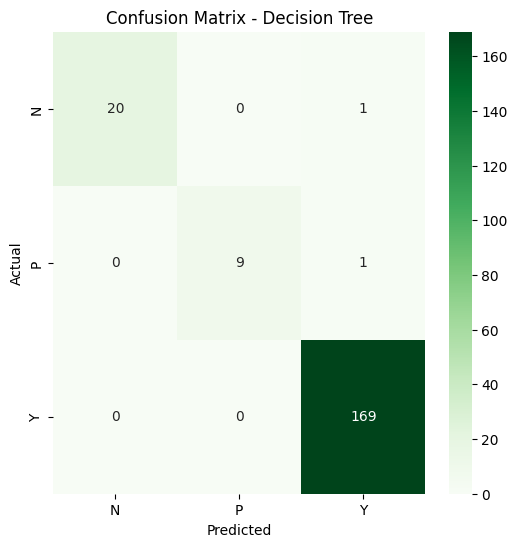

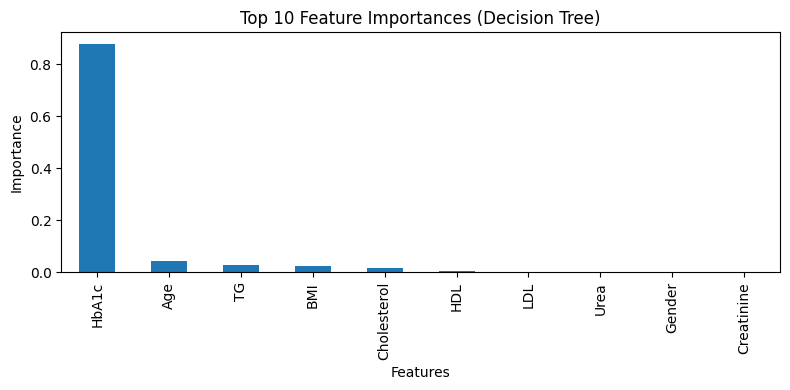

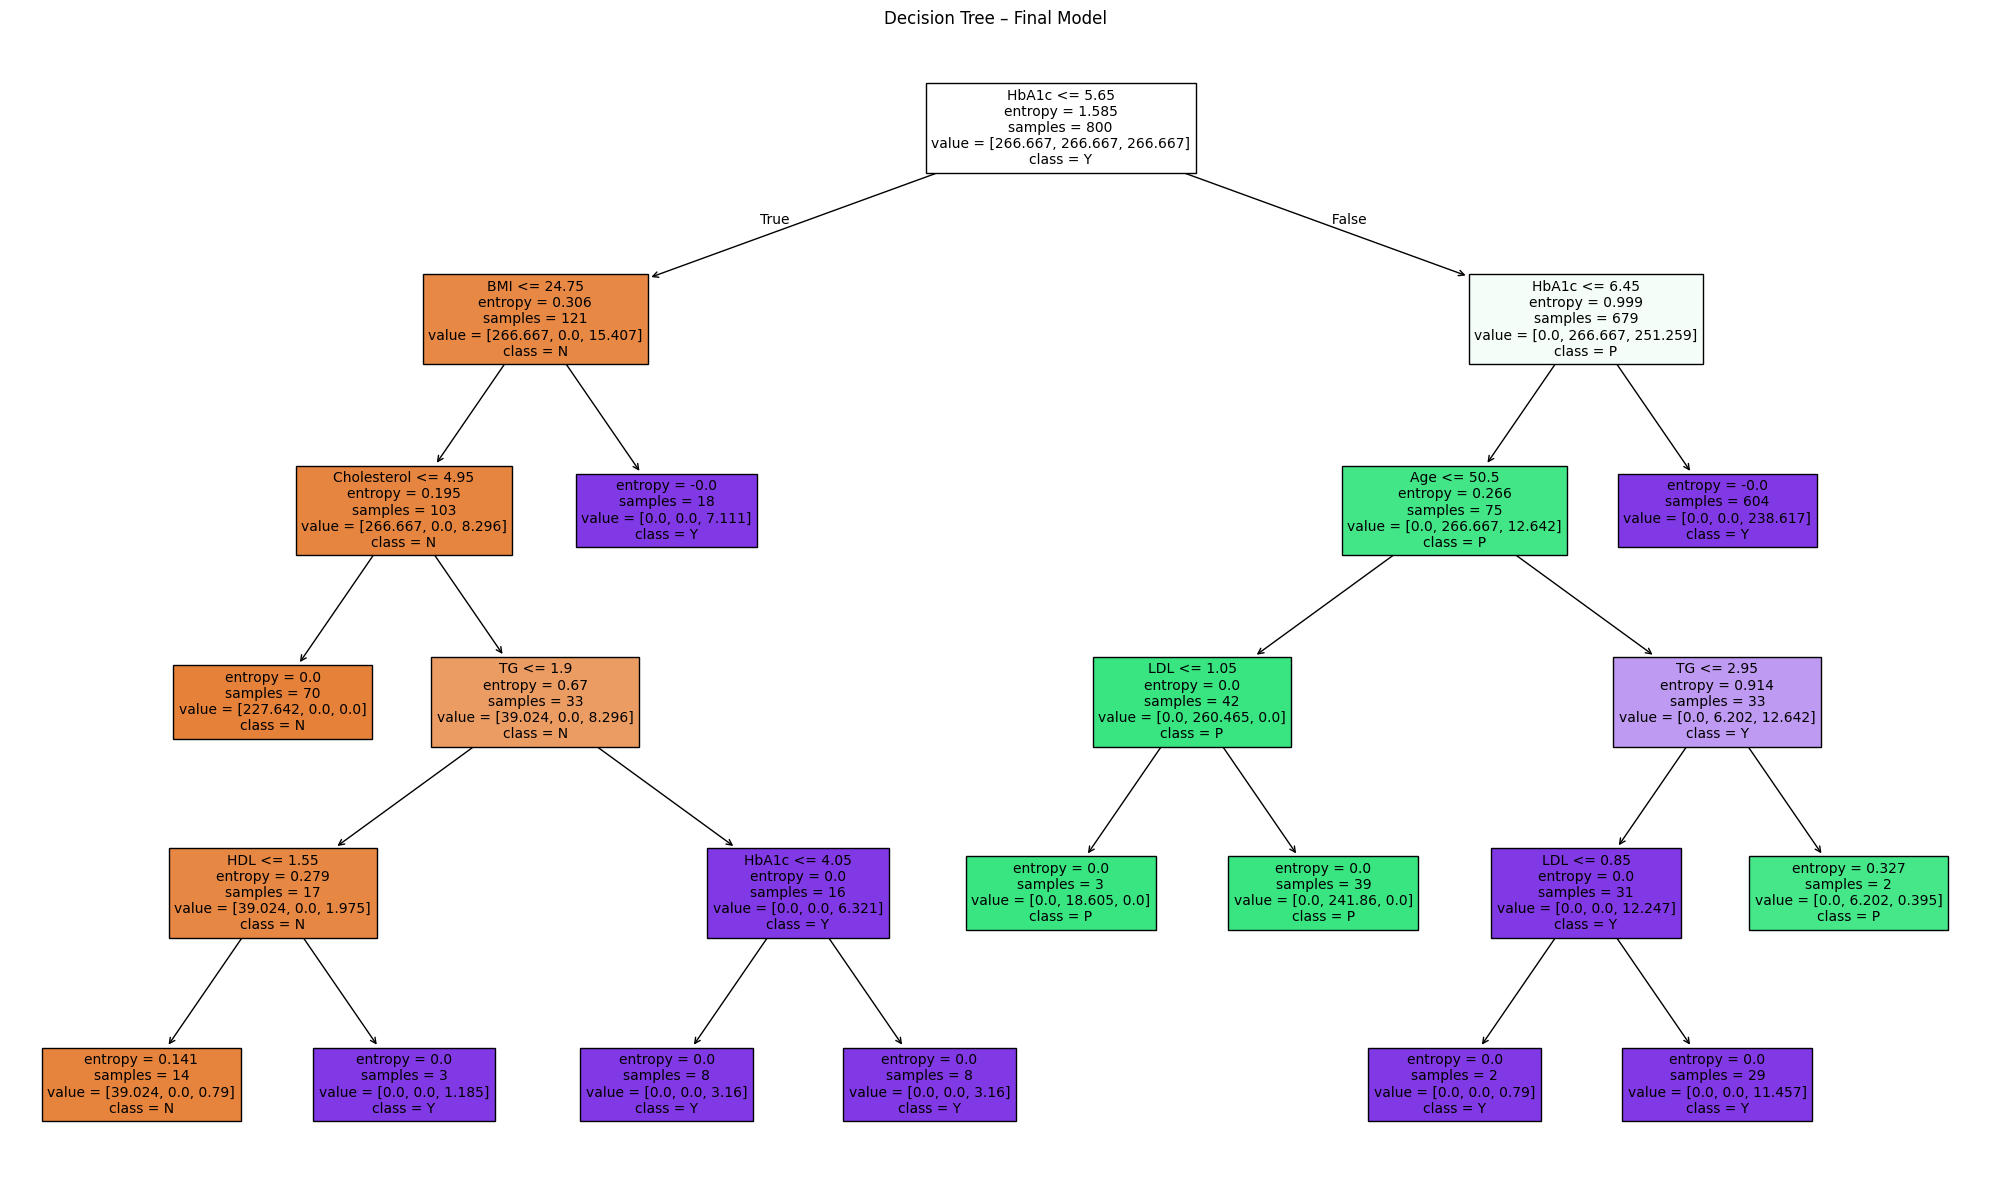

In [ ]:
# ==========================================
# 3) DECISION TREE CLASSIFIER
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import joblib

RANDOM_STATE = 42  # for reproducibility

print("\n==========================================")
print("        DECISION TREE CLASSIFIER")
print("==========================================")

# ---------------------------
# 1) Baseline Decision Tree
# ---------------------------

dt_baseline = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight="balanced"
)

dt_baseline.fit(X_train, y_train)
y_val_pred_dt_base = dt_baseline.predict(X_val)

dt_val_acc_base = accuracy_score(y_val, y_val_pred_dt_base)
dt_val_f1_weighted_base = f1_score(y_val, y_val_pred_dt_base, average="weighted")
dt_val_f1_macro_base = f1_score(y_val, y_val_pred_dt_base, average="macro")

print("\n[Baseline DT] Val Accuracy: {:.4f}".format(dt_val_acc_base))
print("[Baseline DT] Val F1 (weighted): {:.4f}".format(dt_val_f1_weighted_base))
print("[Baseline DT] Val F1 (macro): {:.4f}".format(dt_val_f1_macro_base))

# ---------------------------
# 2) GridSearchCV for DT
# ---------------------------

param_grid_dt = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

min_class_dt = y_train.value_counts().min()
n_splits_dt = int(min(5, max(2, min_class_dt)))

cv_dt = StratifiedKFold(
    n_splits=n_splits_dt,
    shuffle=True,
    random_state=RANDOM_STATE
)

dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(
        random_state=RANDOM_STATE,
        class_weight="balanced"
    ),
    param_grid=param_grid_dt,
    scoring="f1_weighted",
    cv=cv_dt,
    n_jobs=-1
)

print("\n[DT GridSearch] Starting hyperparameter search...")
dt_grid.fit(X_train, y_train)

print("\n[DT GridSearch] Best Parameters:", dt_grid.best_params_)
print("[DT GridSearch] Best CV F1 (weighted): {:.4f}".format(dt_grid.best_score_))

best_dt = dt_grid.best_estimator_

# ---------------------------
# 3) Validation performance (tuned DT)
# ---------------------------

y_val_pred_dt = best_dt.predict(X_val)

dt_val_acc_tuned = accuracy_score(y_val, y_val_pred_dt)
dt_val_f1_weighted_tuned = f1_score(y_val, y_val_pred_dt, average="weighted")
dt_val_f1_macro_tuned = f1_score(y_val, y_val_pred_dt, average="macro")

print("\n[Tuned DT] Val Accuracy: {:.4f}".format(dt_val_acc_tuned))
print("[Tuned DT] Val F1 (weighted): {:.4f}".format(dt_val_f1_weighted_tuned))
print("[Tuned DT] Val F1 (macro): {:.4f}".format(dt_val_f1_macro_tuned))

print("\n[Tuned DT] Classification Report (Validation):")
print(classification_report(y_val, y_val_pred_dt, target_names=target_names))

# ---------------------------
# 4) Refit on Train+Val and save model
# ---------------------------

X_trainval = pd.concat([X_train, X_val], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)

final_dt = DecisionTreeClassifier(
    **dt_grid.best_params_,
    random_state=RANDOM_STATE,
    class_weight="balanced"
)
final_dt.fit(X_trainval, y_trainval)
joblib.dump(final_dt, "best_tree.pkl")
print("\nSaved final Decision Tree model to best_tree.pkl")

# ---------------------------
# 5) Test evaluation
# ---------------------------

y_test_pred_dt = final_dt.predict(X_test)

dt_test_acc = accuracy_score(y_test, y_test_pred_dt)
dt_test_f1_weighted = f1_score(y_test, y_test_pred_dt, average="weighted")
dt_test_f1_macro = f1_score(y_test, y_test_pred_dt, average="macro")
conf_dt = confusion_matrix(y_test, y_test_pred_dt)

print("\n=== Decision Tree Results (Test) ===")
print("Accuracy: {:.4f}".format(dt_test_acc))
print("F1-score (weighted): {:.4f}".format(dt_test_f1_weighted))
print("F1-score (macro): {:.4f}".format(dt_test_f1_macro))
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_dt, target_names=target_names))

plt.figure(figsize=(6, 6))
sns.heatmap(conf_dt, annot=True, fmt="d", cmap="Greens",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------
# 6) Feature importances
# ---------------------------

importances = final_dt.feature_importances_
imp_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 4))
imp_series.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# ---------------------------
# 7) Decision Tree Visualization (full tree)
# ---------------------------

# Choose which model to plot: prefer final_dt, then best_dt, then from disk, then baseline
model_to_plot = locals().get("final_dt", None)
if model_to_plot is None:
    model_to_plot = locals().get("best_dt", None)
if model_to_plot is None:
    try:
        model_to_plot = joblib.load("best_tree.pkl")
    except Exception:
        model_to_plot = dt_baseline  # fallback

# Get feature names and class names
feat_names = list(X.columns)
labels = getattr(model_to_plot, "classes_", None)

# Map numeric class indices back to original labels (N, P, Y) if le_class is available
if labels is not None and "le_class" in globals():
    class_names = [le_class.inverse_transform([c])[0] for c in labels]
elif labels is not None:
    class_names = [str(c) for c in labels]
else:
    class_names = None

plt.figure(figsize=(20, 12))
plot_tree(
    model_to_plot,
    feature_names=feat_names,
    class_names=class_names,
    filled=True,
    fontsize=10
)
plt.title("Decision Tree – Final Model")
plt.tight_layout()
plt.savefig("decision_tree.png", dpi=200, bbox_inches="tight")
plt.show()


# KNN Model


            KNN CLASSIFIER

[Baseline KNN] Validation Accuracy: 0.9187
[Baseline KNN] Validation F1 (weighted): 0.9155
[Baseline KNN] Validation F1 (macro): 0.7413

[KNN GridSearch] Starting hyperparameter search...

[KNN GridSearch] Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
[KNN GridSearch] Best CV F1 (weighted): 0.9439

[Tuned KNN] Validation Accuracy: 0.9563
[Tuned KNN] Validation F1 (weighted): 0.9545
[Tuned KNN] Validation F1 (macro): 0.8647

[Tuned KNN] Classification Report (Validation):
              precision    recall  f1-score   support

           N       0.81      0.81      0.81        16
           P       1.00      0.67      0.80         9
           Y       0.97      0.99      0.98       135

    accuracy                           0.96       160
   macro avg       0.93      0.82      0.86       160
weighted avg       0.96      0.96      0.95       160


Saved final KNN model to best_knn.pkl

[KNN Test] Accuracy: 0.9400
[

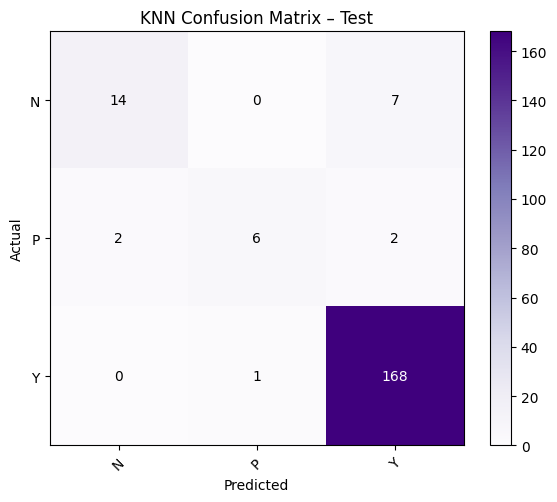

In [ ]:
# ==========================================
# 4) KNN CLASSIFIER
# ==========================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import joblib
import numpy as np

print("\n==========================================")
print("            KNN CLASSIFIER")
print("==========================================")

# 1) Baseline KNN
knn_baseline = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform",
    metric="minkowski",
    p=2
)

knn_baseline.fit(X_train_scaled, y_train)
y_val_pred_knn_base = knn_baseline.predict(X_val_scaled)

val_acc_base = accuracy_score(y_val, y_val_pred_knn_base)
val_f1_weighted_base = f1_score(y_val, y_val_pred_knn_base, average="weighted")
val_f1_macro_base = f1_score(y_val, y_val_pred_knn_base, average="macro")

print("\n[Baseline KNN] Validation Accuracy: {:.4f}".format(val_acc_base))
print("[Baseline KNN] Validation F1 (weighted): {:.4f}".format(val_f1_weighted_base))
print("[Baseline KNN] Validation F1 (macro): {:.4f}".format(val_f1_macro_base))

# 2) GridSearchCV Tuning
min_class_count_knn = y_train.value_counts().min()
n_splits_knn = int(min(5, max(2, min_class_count_knn)))

cv_knn = StratifiedKFold(
    n_splits=n_splits_knn,
    shuffle=True,
    random_state=RANDOM_STATE
)

param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2]
}

knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring="f1_weighted",
    cv=cv_knn,
    refit=True,
    n_jobs=-1
)

print("\n[KNN GridSearch] Starting hyperparameter search...")
knn_grid.fit(X_train_scaled, y_train)

print("\n[KNN GridSearch] Best Parameters:", knn_grid.best_params_)
print("[KNN GridSearch] Best CV F1 (weighted): {:.4f}".format(knn_grid.best_score_))

best_knn = knn_grid.best_estimator_

# 3) Validation performance
y_val_pred_knn = best_knn.predict(X_val_scaled)

print("\n[Tuned KNN] Validation Accuracy: {:.4f}".format(
    accuracy_score(y_val, y_val_pred_knn)
))
print("[Tuned KNN] Validation F1 (weighted): {:.4f}".format(
    f1_score(y_val, y_val_pred_knn, average="weighted")
))
print("[Tuned KNN] Validation F1 (macro): {:.4f}".format(
    f1_score(y_val, y_val_pred_knn, average="macro")
))

print("\n[Tuned KNN] Classification Report (Validation):")
print(classification_report(y_val, y_val_pred_knn, target_names=target_names))

# 4) Refit on Train+Val and save
X_trainval_knn = pd.concat([X_train, X_val], axis=0)
y_trainval_knn = pd.concat([y_train, y_val], axis=0)

final_knn = KNeighborsClassifier(**knn_grid.best_params_)
final_knn.fit(X_trainval_knn, y_trainval_knn)

joblib.dump(final_knn, "best_knn.pkl")
print("\nSaved final KNN model to best_knn.pkl")

# 5) Final Test Evaluation
y_test_pred_knn = final_knn.predict(X_test)

print("\n[KNN Test] Accuracy: {:.4f}".format(
    accuracy_score(y_test, y_test_pred_knn)
))
print("[KNN Test] F1 (weighted): {:.4f}".format(
    f1_score(y_test, y_test_pred_knn, average="weighted")
))
print("[KNN Test] F1 (macro): {:.4f}".format(
    f1_score(y_test, y_test_pred_knn, average="macro")
))

print("\n[KNN Test] Classification Report:")
print(classification_report(y_test, y_test_pred_knn, target_names=target_names))

# 6) Confusion Matrix – Test
labels_knn = final_knn.classes_  # encoded class indices (e.g., 0, 1, 2)
cm_knn = confusion_matrix(y_test, y_test_pred_knn, labels=labels_knn)

# Map encoded labels back to original class names (N, P, Y) using le_class
if "le_class" in globals():
    class_labels_knn = [le_class.inverse_transform([c])[0] for c in labels_knn]
else:
    class_labels_knn = [str(c) for c in labels_knn]

plt.figure(figsize=(6, 5))
plt.imshow(cm_knn, interpolation="nearest", cmap="Purples")
plt.title("KNN Confusion Matrix – Test")
plt.colorbar()

ticks = np.arange(len(labels_knn))
plt.xticks(ticks, class_labels_knn, rotation=45)  # show N / P / Y
plt.yticks(ticks, class_labels_knn)

thresh = cm_knn.max() / 2.0
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        plt.text(
            j, i, str(cm_knn[i, j]),
            ha="center", va="center",
            color="white" if cm_knn[i, j] > thresh else "black"
        )

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

